## Titanic tutorial #1  - tutorial by 이유한님

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)  #필자가 항상 쓰는 방법이람.

In [6]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


앞으로 우리가 해야할 프로세스

1. 데이터셋 확인 - null 데이터의 확인 및 수정
2. 탐색적 데이터 분석 - 여러 피처들을 개별분석 / 피처간의 상관관계 확인. 여러 시각화를 이용하여 인사이트를 얻는다.
3. feature engineering - 모델 세우기에 앞서, 모델 성능을 높일수있도록 feature들을 engineering한다. one-hot encoding, class로 / 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기 - sklearn을 이용해 만든다. sklearn을 이용하면 많은 알고리즘을 일관된 문법으로 사용 가능하다. 물론 tensorflow, pytorch를 사용할 수도 있다.
5. 학습 및 예측 - trainset으로 모델 학습시킨 후, testset을 가지고 prediction 한다.
6. 모델 평가 - 예측 성능을 원하는 수준인지 확인한다. 모델이 어떤 것을 학습하였는지도 확인해 본다.

### 1. 데이터셋 확인

In [9]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.1 Null data 체크하기

In [15]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [16]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,
                                                                 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


- missingno 패키지를 활용해서 null data 를 더 쉽게 볼 수 있다

<AxesSubplot:>

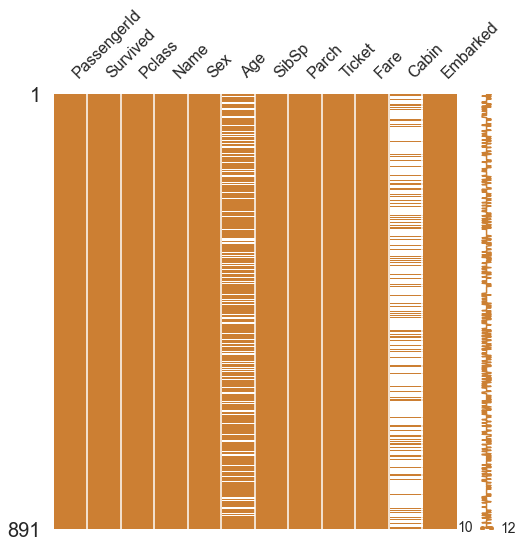

In [17]:
msno.matrix(df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

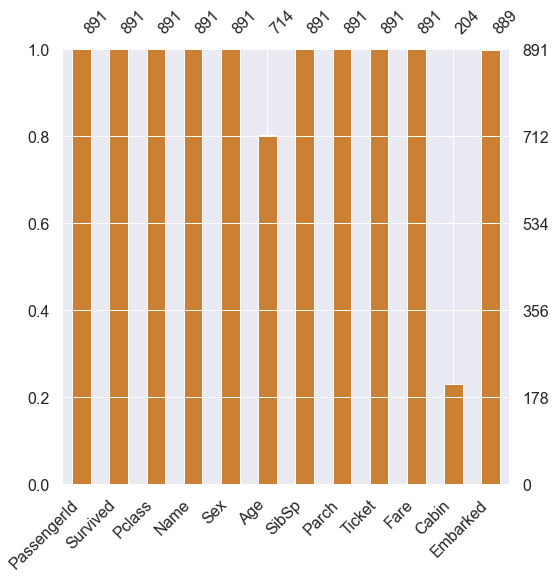

In [18]:
msno.bar(df_train, figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

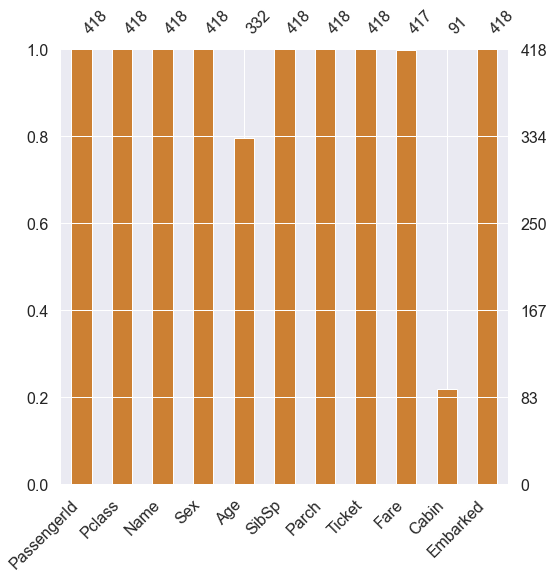

In [19]:
msno.bar(df_test, figsize=(8,8), color=(0.8, 0.5, 0.2))

#### 1.2 Target label 확인
- target (생존율) 이 어떤 분포를 갖는지 확인해야 한다.
- 1 / 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있음.

Text(0.5, 1.0, 'Count plot - Survived')

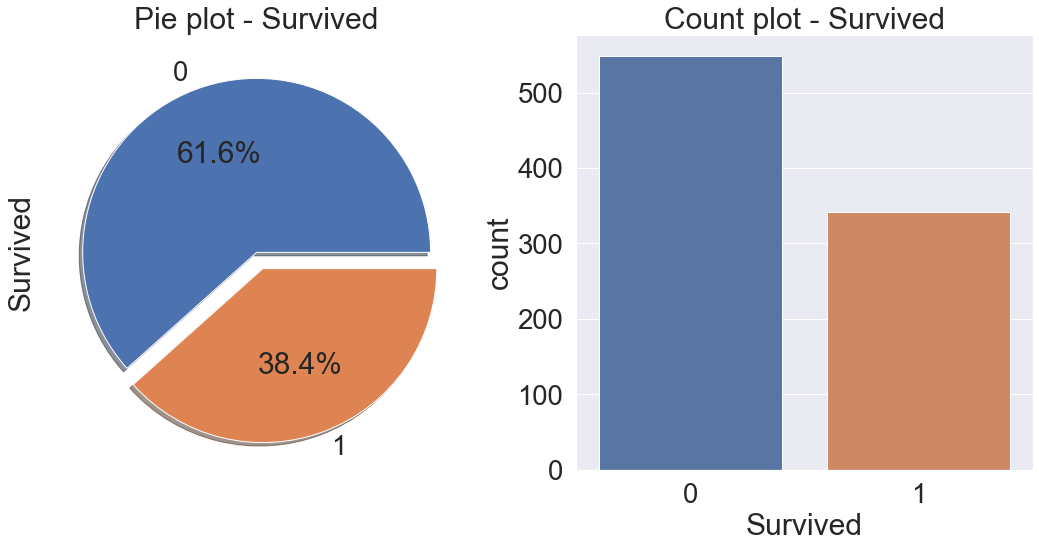

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                             autopct='%1.1f%%', ax=ax[0],
                                            shadow=True)
ax[0].set_title('Pie plot - Survived')
# ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

- target label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

### 2. 탐색적 데이터 분석
- 적절한 시각화가 필요
- 시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 목적에 맞게 잘 뽑아쓰자.

#### 2.1 Pclass
- 먼저 pclass에 따른 생존률 차이를 살펴본다. groupby를 사용하여 피벗 차트와 같은 기능을 사용한다. pivot 이라는 메소드도 있다.
- Pclass, survived 를 가져온 후 pclass로 묶는다. 그러면 pclass별 생존률이 나옴

In [26]:
# 총 인원수
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [27]:
# 생존인원
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
# pd crosstab을 이용하면 좀더 수월
pd.crosstab(df_train['Pclass'], df_train['Survived'], 
           margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped 객체에 mean()을 하게 되면 "1의 합 / 모든 사람 수" 가 되므로 각 클래스별 생존률을 얻을 수 있다. 

<AxesSubplot:xlabel='Pclass'>

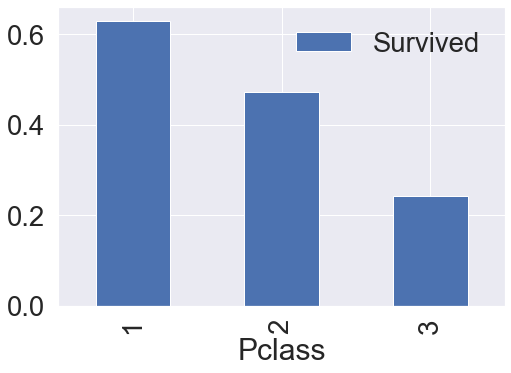

In [30]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=True).\
mean().sort_values(by='Survived', ascending=False).plot.bar()

- 결과 : Pclass 가 높을 수록 생존률이 높다. 

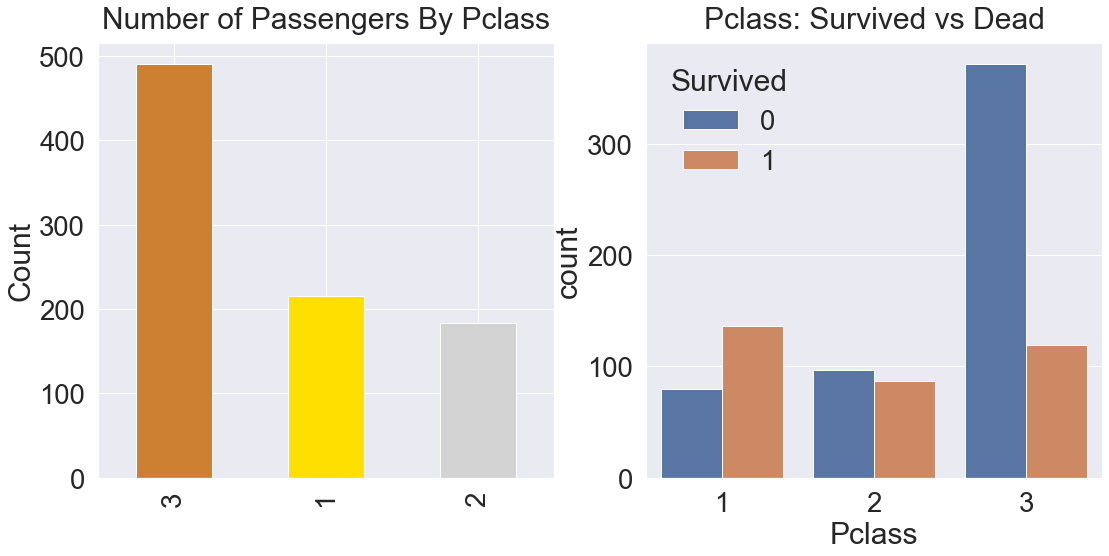

In [37]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',
             data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',
               y=y_position)
plt.show()

#### 2.2 Sex
- 성별에 따른 생존률

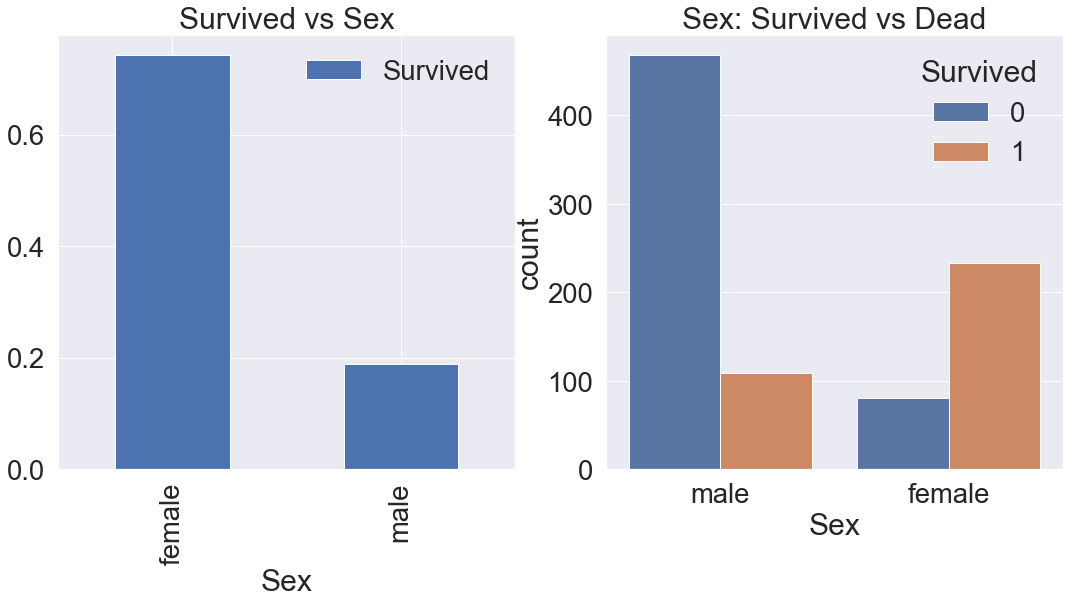

In [38]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=True).\
mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train,
             ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [39]:
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).\
mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).\
style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 여성이 생존률이 훨씬 높으므로 중요하다는 것을 알 수 있다.

#### 2.3 Both Sex and Pclass
- sex, pclass 두가지에 대하여 생존이 어떻게 달라지는 지 확인해 보자. 
- seaborn -> factorplot을 이용하면 손쉽게 3차원 그래프를 그릴 수 있다.

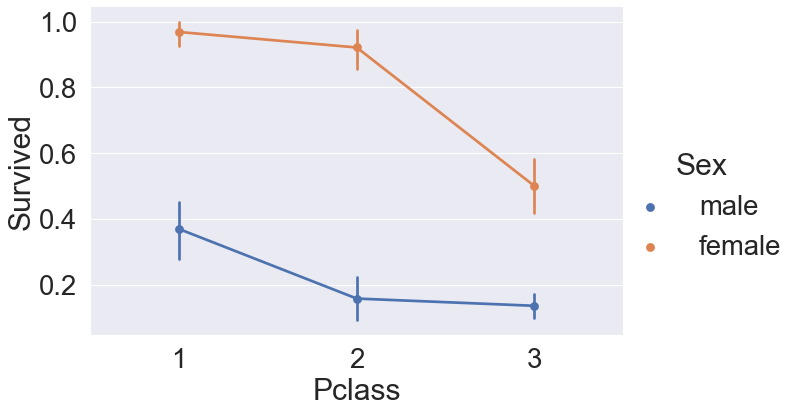

In [42]:
sns.factorplot('Pclass', 'Survived', hue='Sex',
              data=df_train, size=6, aspect=1.5)

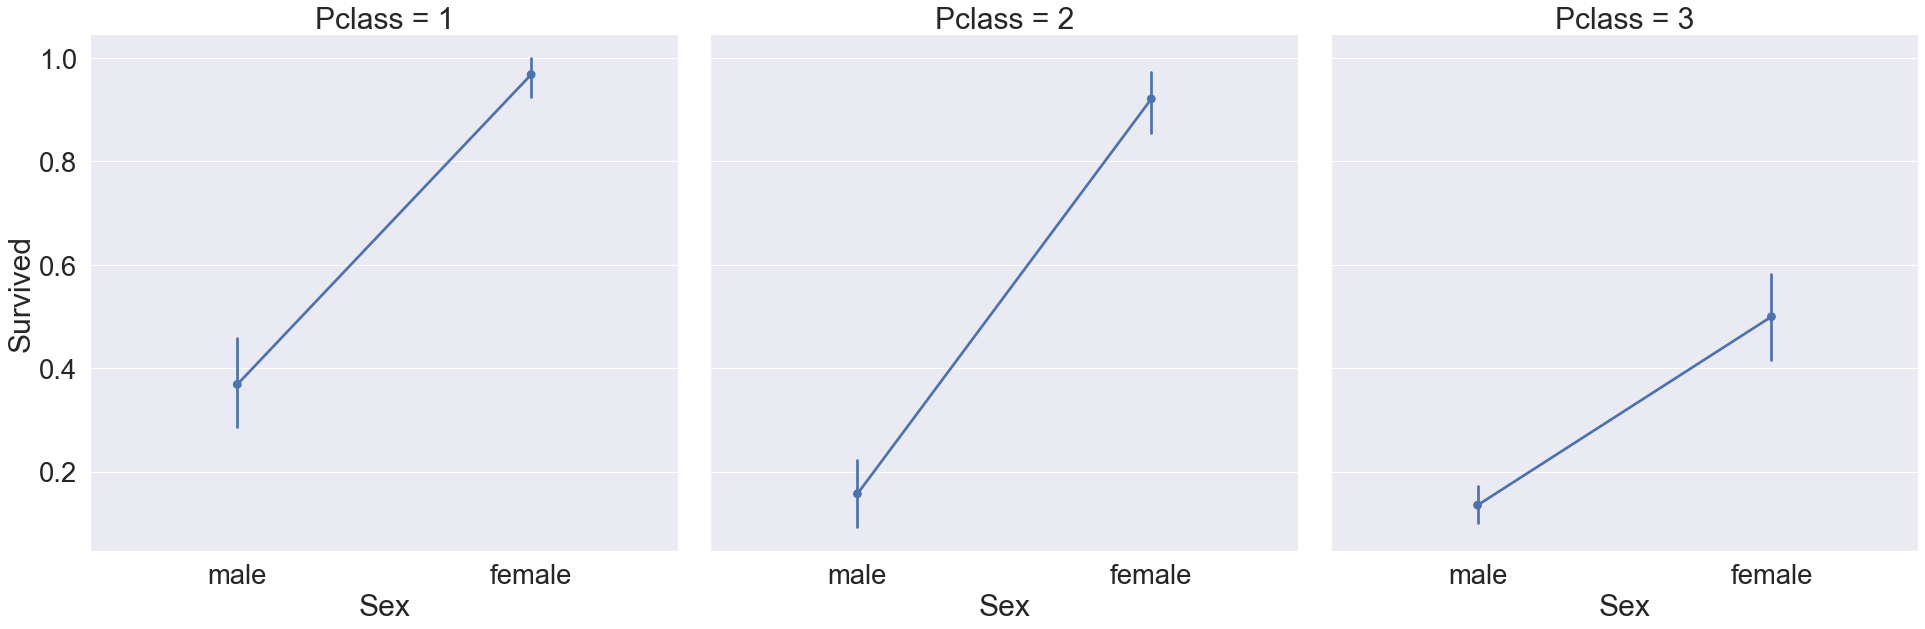

In [46]:
sns.factorplot('Sex','Survived', col='Pclass',
              data=df_train, saturation=.5,
               size=9, aspect=1)

#### 2.4 Age
- age feature / age histogram

In [ ]:
print('')